In [75]:
import pandas as pd
import numpy as np

# Summarizing, Aggregating & Grouping
Knowing how to use pandas aggregation & grouping functions lets us reduce the dimensionality of our data and visualize it in different ways (most often over the rows - aka `axis=0`).  

For completeness, `axis=1` refers to the columns.

In [67]:
wine = pd.read_csv('data/wine_reviews/winemag-data_first150k.csv', index_col=0)

## Initial quick analysis using pandas
Pandas has multiple built-in functions that make it easy to quickly see what's in your dataframe. 
You can build them with the selecting tools you used before.

Here, we will select a column, and then see how pandas lets us quickly analyse it.

To quickly see which columns our wine dataset has, we can use the .columns attribute.

In [76]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Let's select price.

In [5]:
wine.loc[:, 'price']

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

We can quickly see some metrics of the price, using some built-in aggregating functions in pandas.

In [6]:
print('Average wine price: ', wine.loc[:, 'price'].mean())
print('Min wine price: ', wine.loc[:, 'price'].min())
print('Median wine price: ', wine.loc[:, 'price'].median())
print('Max wine price: ', wine.loc[:, 'price'].max())

Average wine price:  33.13148249353299
Min wine price:  4.0
Median wine price:  24.0
Max wine price:  2300.0


And some more advanced metrics...

We can see how many times each country appears in the datast (called a value count)

In [7]:
wine.loc[:, 'country'].value_counts().sort_index()

Albania                       2
Argentina                  5631
Australia                  4957
Austria                    3057
Bosnia and Herzegovina        4
Brazil                       25
Bulgaria                     77
Canada                      196
Chile                      5816
China                         3
Croatia                      89
Cyprus                       31
Czech Republic                6
Egypt                         3
England                       9
France                    21098
Georgia                      43
Germany                    2452
Greece                      884
Hungary                     231
India                         8
Israel                      630
Italy                     23478
Japan                         2
Lebanon                      37
Lithuania                     8
Luxembourg                    9
Macedonia                    16
Mexico                       63
Moldova                      71
Montenegro                    2
Morocco 

What if we want to see this list in the opposite order?

In [8]:
wine.loc[:, 'country'].value_counts().sort_values(ascending=True)

US-France                     1
Tunisia                       2
Japan                         2
Montenegro                    2
Albania                       2
Slovakia                      3
Egypt                         3
China                         3
Bosnia and Herzegovina        4
South Korea                   4
Switzerland                   4
Ukraine                       5
Czech Republic                6
India                         8
Lithuania                     8
Luxembourg                    9
England                       9
Morocco                      12
Serbia                       14
Macedonia                    16
Brazil                       25
Cyprus                       31
Lebanon                      37
Georgia                      43
Turkey                       52
Mexico                       63
Moldova                      71
Bulgaria                     77
Croatia                      89
Uruguay                      92
Slovenia                     94
Romania 

This list is too long. What if we only want to see the top 10 countries?
We can string together the other selectors we learned before!

Can you think of another way to get the top 10 rows?

In [78]:
# wine.loc[:, 'country'].value_counts().head(10)
wine.loc[:, 'country'].value_counts()[:10]
wine.loc[:, 'country'].value_counts().iloc[:10]

US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64

What's the difference between `.value_counts()` and `.count()`?

In [11]:
wine.loc[:, 'country'].count()

150925

What if we just want to know how many countries are on the list?

In [12]:
# Number of non-null unique values
wine.loc[:, 'country'].nunique()

48

And if we want a list of them? 
(This isn't a pandas thing, but is still super useful:)

In [13]:
# Gives all unique values
set(wine['country'])

{'Albania',
 'Argentina',
 'Australia',
 'Austria',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Egypt',
 'England',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Mexico',
 'Moldova',
 'Montenegro',
 'Morocco',
 'New Zealand',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Switzerland',
 'Tunisia',
 'Turkey',
 'US',
 'US-France',
 'Ukraine',
 'Uruguay',
 nan}

You can look [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) for a list of all the built-in pandas stats.

Remember, for quick calculation of summary statistics we can use `df.describe()`. This quickly calculates some of these stats for the numeric columns in the df.

In [14]:
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


**Question**: Why are only 2 of the columns included?

In [80]:
# bc just two are numerical
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


### Conditional Selections 
We can use conditional selections to narrow our analysis even further.

DON'T FORGET - to make things easier, we can save selections we plan to use often as their own variables.

In [83]:
us = wine.loc[wine.loc[:, 'country']=='US']
france = wine.loc[wine.loc[:, 'country']=='France']

Let's compare the difference in average price between US wines, French wines, and all the wines in our complete dataset.

In [84]:
# calculating average wine prices 
avg_us_price = round(us.loc[:, 'price'].mean(),2)
avg_french_price = round(france.loc[:, 'price'].mean(),2)
avg_overall_price = round(wine.loc[:, 'price'].mean(),2)

# printing prices

print('Mean American wine price: $', avg_us_price)
print('Mean French wine price: $', avg_french_price)
print('Mean overall wine price is: $', avg_overall_price)

Mean American wine price: $ 33.65
Mean French wine price: $ 45.62
Mean overall wine price is: $ 33.13


We can then use these to calculate more targeted metrics.

In [87]:
french_excess = round((avg_french_price - avg_overall_price), 2)
percentage_excess = round(french_excess/avg_overall_price, 2)
print(f"French wine is {french_excess} more expensive on average that\'s {percentage_excess}% more")

French wine is 12.49 more expensive on average that's 0.38% more


#### More advanced conditionals: Using masks
When you want to filter on >1 criteria, it can be easier to use a mask.

How many wines from North America do we have on our list?

In [96]:
na_mask

0          True
1         False
2          True
3          True
4         False
          ...  
150925    False
150926    False
150927    False
150928    False
150929    False
Name: country, Length: 150930, dtype: bool

In [93]:
na_mask = (wine.country == 'US') | (wine.country == 'Mexico') | (wine.country == 'Canada') 
na_indexes = wine.index[na_mask] # na_mask is  list of True and False
na = wine.loc[na_indexes]


In [98]:
na.loc[na_mask] # ?
wine.loc[na_mask]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


In [89]:
na.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [20]:
na_1.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


How many wines do we have total in the in North America?

In [21]:
# taking one of the columns that had no null values to get "real" count
na.count()['description']

62656

**Question**: How many of the wines belong to each country?



In [22]:
na.loc[:, "country"].value_counts()

US        62397
Canada      196
Mexico       63
Name: country, dtype: int64

**Question**: From which US state do most of our wines come?

In [23]:
us.loc[:, "province"].value_counts().sort_values(ascending=False).head(1)

California    44508
Name: province, dtype: int64

## Groupby
One of the most flexible ways to aggregate in pandas is with .groupby() .
We will look at how this works for categorical datasets like this one, and also for datetime datasets, as dealing with datetimes in pandas can be tricky.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

### How Groupby Works:
You can group your data in many different ways, and also aggregate it by any of the aggregators we saw before: like mean, mode, sum, etc.

**The column that you put in the parentheses of the groupby function call will become your new index in the dataframe that is returned by groupby!!**

For example, in `wine.groupby('country')`, `country` will bee the new index. Let's see how this looks in practice:

In [25]:
wine.groupby('country').mean().sort_values(by=['points','price'], ascending=False)

,points,price
country,,
England,92.888889,47.500000
Austria,89.276742,31.192106
France,88.925870,45.619885
Germany,88.626427,39.011078
Italy,88.413664,37.547913
Canada,88.239796,34.628866
Slovenia,88.234043,28.061728
Morocco,88.166667,18.833333
Turkey,88.096154,25.800000


So, British wine is the highest average ranked?? This is surprising. Maybe we need to look at our data in a different way.

The beauty of `df.groupby()` is that it lets you aggregate different columns in different ways.

Say we want to know the average price of wine in each country, but the _highest_ score:

In [26]:
wine.groupby('country').agg({'points':'max', 'price':'mean'})\
    .sort_values(by=['points','price'], ascending=[False, True]).head()

,points,price
country,,
Australia,100,31.258480
US,100,33.653808
Italy,100,37.547913
France,100,45.619885
Portugal,99,26.332615


**Tip:** Sometimes, fo make your code cleaner it's best to move the aggregations out and store them in their own variable that you can update saparately.

In [27]:
aggs = {
    'price': 'mean',
    'points': 'max'
}

wine.groupby('country').agg(aggs).sort_values(by=['points','price'], ascending =[False, True]).head()

,price,points
country,,
Australia,31.258480,100
US,33.653808,100
Italy,37.547913,100
France,45.619885,100
Portugal,26.332615,99


You can also use a list in your aggs to aggergate one column in different ways.

This will give a **multi-index**. Multi-indexes can be difficult to sort on. But, there are a few different ways we can deal with this.

In [99]:
aggs = {
    'price': ['min', 'mean', 'max', 'std']
}

price_table = wine.groupby('country').agg(aggs)
price_table

price                              
                         min       mean     max        std
country                                                   
Albania                 20.0  20.000000    20.0   0.000000
Argentina                4.0  20.794881   250.0  20.186540
Australia                5.0  31.258480   850.0  39.008512
Austria                  8.0  31.192106  1100.0  28.540861
Bosnia and Herzegovina  12.0  12.750000    13.0   0.500000
Brazil                  11.0  19.920000    35.0   8.840814
Bulgaria                 7.0  11.545455    28.0   4.959163
Canada                  12.0  34.628866   145.0  24.267644
Chile                    5.0  19.344780   400.0  19.618082
China                    7.0  20.333333    27.0  11.547005
Croatia                 12.0  23.108434    65.0  12.375243
Cyprus                  10.0  15.483871    22.0   3.731586
Czech Republic          15.0  18.000000    25.0   4.000000
Egypt                    NaN        NaN     NaN        NaN
England                 38.0  47.500000    75.0  11.964232
France                   5.0  45.619885  2300.0  69.697060
Georgia                  9.0  18.581395    40.0   8.990028
Germany                  5.0  39.011078   775.0  56.857128
Greece                   7.0  21.747706   120.0  12.273692
Hungary                  7.0  44.204348   764.0  66.264502
India                   10.0  13.875000    20.0   3.870677
Israel                   8.0  31.304918   150.0  19.650363
Italy                    5.0  37.547913   900.0  37.067869
Japan                   24.0  24.000000    24.0   0.000000
Lebanon                 12.0  25.432432    51.0  12.835585
Lithuania               10.0  10.000000    10.0   0.000000
Luxembourg              36.0  40.666667    50.0   7.000000
Macedonia               12.0  15.312500    25.0   4.377499
Mexico                  12.0  29.095238   108.0  16.938898
Moldova                  8.0  15.366197    42.0   7.679731
Montenegro              10.0  10.000000    10.0   0.000000
Morocco                  6.0  18.833333    35.0   7.755741
New Zealand              7.0  24.173290   125.0  13.569317
Portugal                 4.0  26.332615   980.0  35.242873
Romania                  4.0  16.395683   320.0  28.845571
Serbia                  15.0  24.285714    42.0   9.335034
Slovakia                15.0  15.333333    16.0   0.577350
Slovenia                 7.0  28.061728    90.0  14.263017
South Africa             5.0  21.130532   145.0  14.248025
South Korea             11.0  13.500000    16.0   2.886751
Spain                    4.0  27.048529   770.0  33.861666
Switzerland             19.0  26.500000    38.0   8.582929
Tunisia                  NaN        NaN     NaN        NaN
Turkey                  14.0  25.800000   120.0  19.120456
US                       4.0  33.653808  2013.0  24.891343
US-France               50.0  50.000000    50.0        NaN
Ukraine                 13.0  13.000000    13.0   0.000000
Uruguay                  7.0  25.847059    60.0  15.066129

One way is by dropping the top level ('price'):

In [29]:
price_table.columns = price_table.columns.droplevel(level=0)

# now, we can sort by any of the columns. Here, by average price.
price_table.sort_values(by='mean', ascending=False).head()

,min,mean,max,std
country,,,,
US-France,50.0,50.000000,50.0,NaN
England,38.0,47.500000,75.0,11.964232
France,5.0,45.619885,2300.0,69.697060
Hungary,7.0,44.204348,764.0,66.264502
Luxembourg,36.0,40.666667,50.0,7.000000


Another way is by using `np.ravel()` . This preserves the "price" indicator somewhere in each of the column names.

In [100]:
# resetting the price table, so that it again has a multi-index
price_table = wine.groupby('country').agg(aggs)

price_table.head()

price                              
                         min       mean     max        std
country                                                   
Albania                 20.0  20.000000    20.0   0.000000
Argentina                4.0  20.794881   250.0  20.186540
Australia                5.0  31.258480   850.0  39.008512
Austria                  8.0  31.192106  1100.0  28.540861
Bosnia and Herzegovina  12.0  12.750000    13.0   0.500000

In [101]:
# seeing how the column names are multi-index
price_table.columns

MultiIndex([('price',  'min'),
            ('price', 'mean'),
            ('price',  'max'),
            ('price',  'std')],
           )

In [103]:
# Using ravel, and a string join, we can create better names for the columns:

price_table.columns = ["_".join(x) for x in price_table.columns.ravel()]
price_table.sort_values(by='price_mean', ascending=False).head()

/tmp/ipykernel_7524/3241002836.py:3: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  price_table.columns = ["_".join(x) for x in price_table.columns.ravel()]


,price_min,price_mean,price_max,price_std
country,,,,
US-France,50.0,50.000000,50.0,NaN
England,38.0,47.500000,75.0,11.964232
France,5.0,45.619885,2300.0,69.697060
Hungary,7.0,44.204348,764.0,66.264502
Luxembourg,36.0,40.666667,50.0,7.000000


**Question**: Create a quick plot of the number of wines made in each country, from highest to lowest.

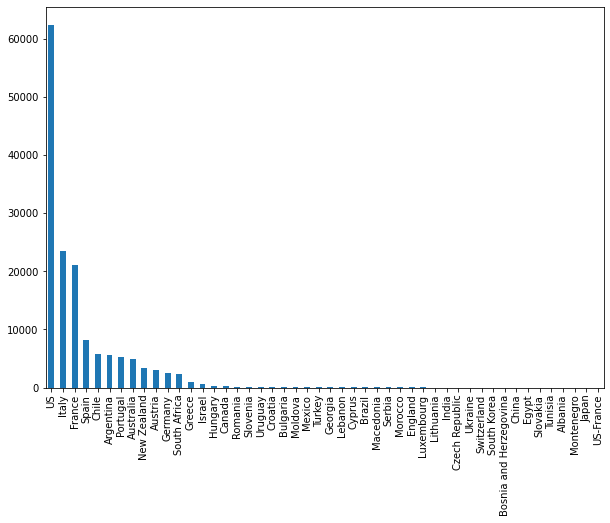

In [33]:
wine.loc[:, 'country'].value_counts().plot(kind='bar', figsize=(10,7))
plt.show()

## Selecting the max and min values with Index Max and Min
In addition to `.max()` and `.min()`, which returns the maximum or minimum values, we can use `.idxmax()` and `.idxmin()` to return the *index* pertaining to the maximum and minimum values. 

For example, let's use `.idxmax()` to find the country with the highest standard deviation in its prices.

In [34]:
price_table.loc[:, 'price_std'].idxmax()

'France'

In [35]:
# looking at the actual standard deviation 
price_table.loc[:, 'price_std'].max()

69.6970600395194

# Dealing with datetime in Pandas
Pandas built off the datetime package in Python to offer a datetime index, and plenty of ways to work with this.
However, it is still far from intuitive. 
That doesn't mean it's not useful, and for anyone doing a timeseries project, you'll need to deal with dates and times in pandas often.

Let's load a sample dataset of datetime energy data and get started!

In [1]:
import pandas as pd

In [3]:
energy = pd.read_csv('data/energy/PJM_Load_hourly.csv', parse_dates=True, index_col=0)

Note that this data has a DateTimeIndex. 
setting `parse_dates=True` when we read the CSV lets pandas infer this datetimeindex.

In [4]:
energy.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2001-01-01 15:00:00', '2001-01-01 16:00:00',
               '2001-01-01 17:00:00', '2001-01-01 18:00:00',
               '2001-01-01 19:00:00', '2001-01-01 20:00:00',
               '2001-01-01 21:00:00', '2001-01-01 22:00:00',
               '2001-01-01 23:00:00', '2001-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=32896, freq=None)

We can select data points within a specific time range, using the DateTimeIndex and .loc.
Here, we select the first one day of data.

In [39]:
energy.loc['1998-12-31 01:00:00':'1999-01-01 00:00:00']

,PJM_Load_MW
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0
1998-12-31 06:00:00,29382.0
1998-12-31 07:00:00,31373.0
1998-12-31 08:00:00,33272.0
1998-12-31 09:00:00,34133.0


In [40]:
# One record for each hour of this day.
energy.loc['1998-12-31 01:00:00':'1999-01-01 00:00:00', :].shape[0]

24

## Selecting with boolean indexing on pandas datetimeindex
We can use .dot notation with parts of the date to select on specific parts of the datetime, like days or months.

This is because pandas datetime indexes are datetime objects under the hood.

Let's look more closely at datetime objects in python.

Python datetime functionality example:

In [5]:
from datetime import datetime

We will start with a string of a date, and save this string in a variable called `s`.

In [42]:
s = "8 March, 2017"

Using a datetime function called `datetime.strptime()`, we can "extract" the date elements from this string.

We do this by giving formatting indicators as to where in the string the various datetime elements are located. The format indicator `%d` denotes an integer day, `%B` denotes a long-form month written in English, and `%Y` denotes a 4-digit year.

You can find more datetime format indicators in python [here](https://mkaz.blog/code/python-dates/) (under "Datetime Format Table").


Using the `.strptime()` function returns a **datetime object**, with the parts of the datetime contained in order from lowest time-granularity to highest (year --> seconds)

In [43]:
d = datetime.strptime(s, '%d %B, %Y')
d

datetime.datetime(2017, 3, 8, 0, 0)

As mentioned before, we can access particular parts of this datetime object using dot notation (as they are stored as attributes of the object)

In [44]:
d.month

3

We can then use a second function from datetime, called `strftime()`, to convert this datetime object back to a string. Here, we have to specify the new string format we would like the new date string to have.

In [45]:
new_s = d.strftime('%Y-%m-%d')
print(new_s)

2017-03-08


Now that we know about the various parts of a datetime object, we can use them to filter conditionally on the datetime object.

In [46]:
# making a new DF that only includes the month of septmeber from each year.
septembers = energy.loc[energy.index.month == 9]

We can also call just a date, and get all the hours/time periods in that day:

In [105]:
energy.loc['2000-01-03']
# energy.loc['2000-01'] # year-month 

,PJM_Load_MW
Datetime,
2000-01-03 01:00:00,21557.0
2000-01-03 02:00:00,20464.0
2000-01-03 03:00:00,20057.0
2000-01-03 04:00:00,19988.0
2000-01-03 05:00:00,20463.0
2000-01-03 06:00:00,22228.0
2000-01-03 07:00:00,25780.0
2000-01-03 08:00:00,28369.0
2000-01-03 09:00:00,29126.0


Same with for a year and month:

In [108]:
energy.loc['2000-01'].shape # 31*24=744

744

In [50]:
# or better, with an assert statement:
month_jan = energy.loc['2000-01']

# assert passes silently, meaning it is True
assert month_jan.shape[0] == 31*24

## Resampling
We can also combine the data in different ways, and over different time periods.
This means that just because our data is in hourly time periods, we dont have to keep it that way. 

In [39]:
pd.resample()

Object `pd.resample` not found.


In [13]:
# We can get the average load over a day:
daily_avg_energy = energy.resample('d').mean()
daily_avg_energy.head()

,PJM_Load_MW
Datetime,
1998-04-01,27813.739130
1998-04-02,26605.791667
1998-04-03,25672.333333
1998-04-04,24487.083333
1998-04-05,23487.565217


In [52]:
# We can also get the total MWh used in a day:
daily_energy = energy.resample('D').sum()
# have to change unit from MW to MWh since summing changes measure from power to energy 
# more info on that here: https://energyeducation.ca/encyclopedia/Energy_vs_power
daily_energy.columns = ["PJM_Load_MWh"]
daily_energy.head()

,PJM_Load_MWh
Datetime,
1998-04-01,639716.0
1998-04-02,638539.0
1998-04-03,616136.0
1998-04-04,587690.0
1998-04-05,540214.0


## Groupby with DateTimeIndex
Using groupby with a pandas DateTimeIndex can be extremely useful and powerful.
Let's look at how this can work.

In [109]:
indexes = [energy.index.year,
           energy.index.month,
           energy.index.week,
           energy.index.weekday,
           energy.index.day]

aggregated = energy.groupby(indexes).sum()

/tmp/ipykernel_7524/1048324898.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  energy.index.week,


In [110]:
aggregated.head()

PJM_Load_MW
Datetime Datetime Datetime Datetime Datetime             
1998     4        14       2        1            639716.0
                           3        2            638539.0
                           4        3            616136.0
                           5        4            587690.0
                           6        5            540214.0

The index level names are not particularly helpful here. We can change them.

In [55]:
# the long, ugly way
aggregated.index.set_names('year', level=0, inplace=True)
aggregated.index.set_names('month', level=1, inplace=True)
aggregated.index.set_names('week', level=2, inplace=True)
aggregated.index.set_names('weekday', level=3, inplace=True)
aggregated.index.set_names('day', level=4, inplace=True)

In [111]:
# resetting the df to get multi-index again
aggregated = energy.groupby(indexes).sum()

# the short, clean way. Both do the same thing.
index_level_names = ['year', 'month', 'week', 'weekday', 'day']
for i, index_level in enumerate(index_level_names):
            aggregated.index.set_names(index_level, level=i, inplace=True)
            

In [112]:
aggregated.head(10)

PJM_Load_MW
year month week weekday day             
1998 4     14   2       1       639716.0
                3       2       638539.0
                4       3       616136.0
                5       4       587690.0
                6       5       540214.0
           15   0       6       640312.0
                1       7       643340.0
                2       8       636976.0
                3       9       657606.0
                4       10      601388.0

## Selecting on Multi-Index: Using reset_index()
Selecting via a multi-index is difficult. It is much easier to work with these as "normal" pandas DataFrame columns.

To transform multi-indexes in to columns, we use `reset_index()`. Reset index pushes anything in the index into columns, and makes a new index with is simply an ascending count, starting at 0. 

In [19]:
aggregated_new = aggregated.reset_index()
aggregated_new.head()

,year,month,week,weekday,day,PJM_Load_MW
0,1998,4,14,2,1,639716.0
1,1998,4,14,3,2,638539.0
2,1998,4,14,4,3,616136.0
3,1998,4,14,5,4,587690.0
4,1998,4,14,6,5,540214.0


Here, we can select all rows that were in week 50 in any year.

In [59]:
week_50 = aggregated_new.loc[aggregated_new['week']==50]
week_50.head()

,year,month,week,weekday,day,PJM_Load_MW
250,1998,12,50,0,7,648160.0
251,1998,12,50,1,8,665456.0
252,1998,12,50,2,9,682451.0
253,1998,12,50,3,10,714059.0
254,1998,12,50,4,11,696829.0


## Exercise:

- Find the day of the week that averages the highest consumption

- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?
    

- Is average consumption rising, falling, or staying the same over the years?
- What is the %age difference in consumption on average between April and June?

In [118]:
# energy.groupby(energy.index.weekday).mean().idxmax()
energy.groupby(energy.index.hour).mean().idxmin()


PJM_Load_MW    4
dtype: int64

- Find the day of the week that averages the highest consumption

In [31]:
energy.head()
energy.groupby(energy.index.weekday).mean().idxmax()

PJM_Load_MW    1
dtype: int64

In [20]:
day_of_week = energy.groupby(energy.index.weekday).mean()
day_of_week.sort_values(by='PJM_Load_MW', ascending=False).index[0]

# 1 = Tuesday.

1

- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?

In [61]:
time_of_day = energy.groupby(energy.index.hour).mean()
time_of_day.sort_values(by='PJM_Load_MW', ascending=True).index[0]

4

In [119]:
time_of_day = energy.groupby([energy.index.year, energy.index.hour]).mean()
time_of_day.groupby(level=0).idxmin()
# In the last year it changed to be midnight

,PJM_Load_MW
Datetime,
1998,"(1998, 4)"
1999,"(1999, 4)"
2000,"(2000, 4)"
2001,"(2001, 4)"
2002,"(2002, 0)"


- Is average consumption rising, falling, or staying the same over the years?

In [ ]:
energy.groupby(energy.index.year).mean()
# energy.groupby(energy.index.year).mean().plot()
# it's increasing

- What is the %age difference in consumption on average between April and June?

In [32]:
avg_monthly_consumption = energy.groupby(energy.index.month).mean()
april_consump = avg_monthly_consumption.loc[4]
june_consump = avg_monthly_consumption.loc[6]

percent_diff = ((june_consump - april_consump) / april_consump ) * 100

print('April consumption average is:', int(april_consump))
print('June consumption average is:', int(june_consump))
print('Percentage Difference in consumption average is:', int(percent_diff))

April consumption average is: 26104
June consumption average is: 31703
Percentage Difference in consumption average is: 21


In [43]:
!pip list | grep 'mat'

matplotlib               3.7.1
matplotlib-inline        0.1.6
nbformat                 5.7.0


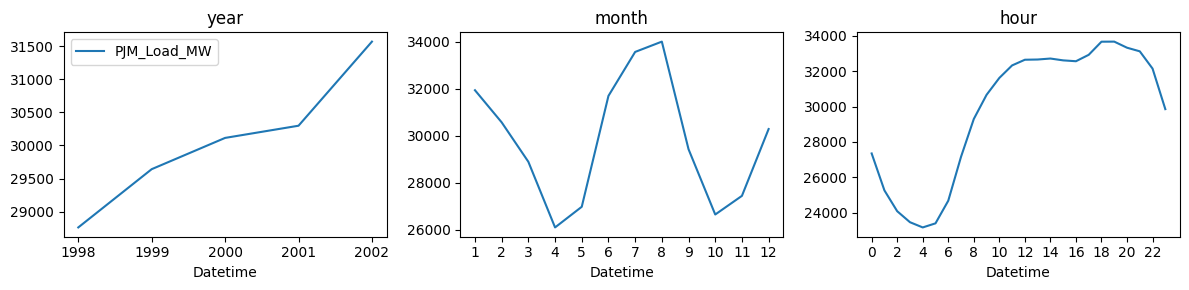

In [74]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

energy.groupby(energy.index.year).mean().plot(ax=axes[0]).set_title('year')
axes[0].set_xticks(range(energy.index.year.min(), energy.index.year.max() + 1))

energy.groupby(energy.index.month).mean().plot(ax=axes[1]).set_title('month')
axes[1].set_xticks(range(1, 13))
axes[1].get_legend().remove() 

energy.groupby(energy.index.hour).mean().plot(ax=axes[2]).set_title('hour')
axes[2].set_xticks(range(24)[::2])
axes[2].get_legend().remove() 

plt.tight_layout()
plt.show()
